<a href="https://colab.research.google.com/github/fernandodeeke/can2025/blob/main/euler_simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1></center></h1>
<center><h1>Análise Numérica</h1></center>
<center><h2>2025/1</h2></center>
<center><h3>Método de Euler Simples</h3></center>
<center><h4>Prof. Fernando Deeke Sasse - CCT, UDESC</h4></center>

## 1. Equações diferenciais ordinárias de primeira ordem

Consideraremos problemas de valor inicial (PVI) da seguinte forma:

$$
y'= f(t,y(t))\,\qquad y(t_0)=y_0\,.
$$

O método de Euler simples é um processo iterativo dado pela expressão

$$
y(t+h)=y(t)+hf(t,y(t))\,.
$$

Implementemos este processo, criando uma função que tem como entrada $f(t,y(t))$, a condição inicial $y_0$ e um array de pontos $t$ correspondendo à malha onde os cálculos serão feitos. Aqui temos $h=t[i+1]-t[i]$.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def odeEuler(f, t, y0):
    N = len(t)
    y = np.empty(N)
    y[0] = y0
    h = t[1] - t[0]  # assume passo constante

    for n in range(N - 1):
        y[n + 1] = y[n] + h * f(t[n], y[n])

    return y

### Exemplo 1.1
Resolvamos o PVI seguinte:

$$
y'= 2t\sin(y)+t^2\,,\qquad y(0)=1\,.
$$

Esta é uma equação não linear, para a qual não há solução exata. Usemos 21 pontos neste intervalo, de modo a termos 20 intervalos. Isso que corresponde a um incremento $h$ dado por

$$
h = \frac{1-0}{20} = 0.05
$$


Definimos a malha:

In [ ]:
t = np.linspace(0,1,21)
t

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

Definimos a função $f(t,y(t))$:

In [ ]:
f = lambda x,y: 2*x*np.sin(y)+x**2

Condição inicial:

In [ ]:
y0 = 1

Podemos agora resolver a equação aplicando a função odeEuler:

In [ ]:
y = odeEuler(f,t,y0)
y

array([1.        , 1.        , 1.00433235, 1.01327039, 1.02712389,
       1.04624019, 1.07100385, 1.10183431, 1.13918064, 1.18351228,
       1.2353045 , 1.29501692, 1.36306365, 1.43977371, 1.52534159,
       1.61976928, 1.72280436, 1.83388188, 1.95208222, 2.07611904,
       2.20437078])

Façamos o gráfico desta solução:

Text(0, 0.5, 'y')

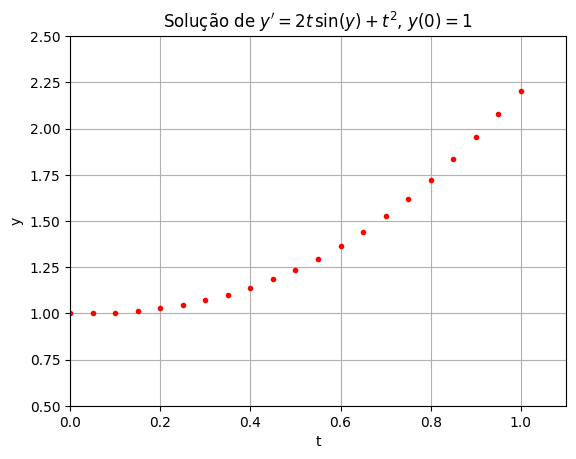

In [ ]:
plt.plot(t,y,'r.')
plt.axis([0,1.1,0.5,2.5])
plt.grid(True)
plt.title(r"Solução de $y' = 2t\, \sin(y) + t^2$, $y(0) = 1$");
plt.xlabel('t')
plt.ylabel('y')

### Exemplo 1.2
Verifiquemos o desempenho do método de Euler simples resolvendo um caso para o qual conhecemos a solução exata. Consideremos o problema de valor inicial

$$
y' +y-ty^3=0\,,\qquad y(0)=1\,
$$
e determinemos a solução no intervalo $[0.2]$ com subintervalos $h=0.05$.
Esta é uma equação de Bernoulli, e a solução para o PVI é dada por

$$
y = \frac{2}{\sqrt{2+4t+2 \mbox{e}^{2t}}}
$$

Escrevendo a EDO na forma $y'=f(t,y(t))$, temos

In [ ]:
f = lambda x,y: -y+x*y**3

In [ ]:
t = np.linspace(0,2,41)

In [ ]:
y0 = 1

In [ ]:
y = odeEuler(f,t,y0)

Façamos o gráfico da solução numérica:

Text(0, 0.5, 'y')

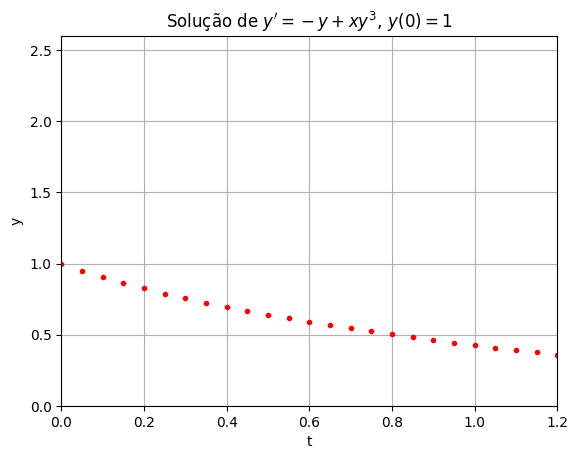

In [ ]:
plt.plot(t,y,'r.')
plt.axis([0,1.2,0.,2.6])
plt.grid(True)
plt.title(r"Solução de $y'=-y+xy^3,\, y(0)=1$");
plt.xlabel('t')
plt.ylabel('y')

Comparemos este resultado com a solução exata:

In [ ]:
yexata = lambda t: 2/(2+4*t+2*np.exp(2*t))**(1/2)

Façamos os gráficos simultâneos:

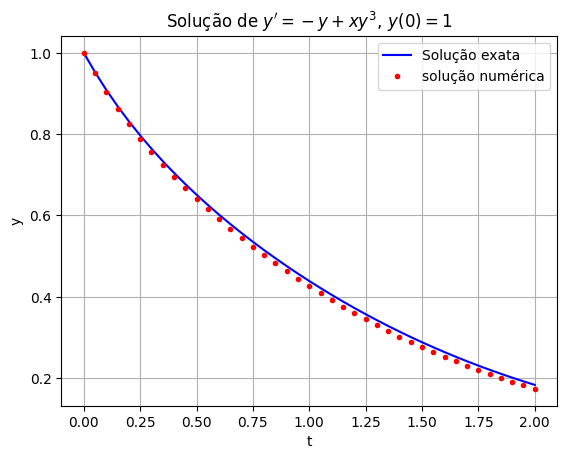

In [ ]:
plt.plot(t,yexata(t),'b-')
plt.plot(t,y,'r.')
#plt.axis([0,2.1,0.,1.1])
plt.grid(True)
plt.title(r"Solução de $y'=-y+xy^3,\, y(0)=1$");
plt.xlabel('t')
plt.ylabel('y')
plt.legend(["Solução exata", "solução numérica"])

Visuamente os dois resultados concordam razoavelmente. A descrição quantitativa do erro na solução numérica pode ser visualizada num gráfico que mostra a diferença dos resultados em cada ponto:

Text(0, 0.5, 'erro')

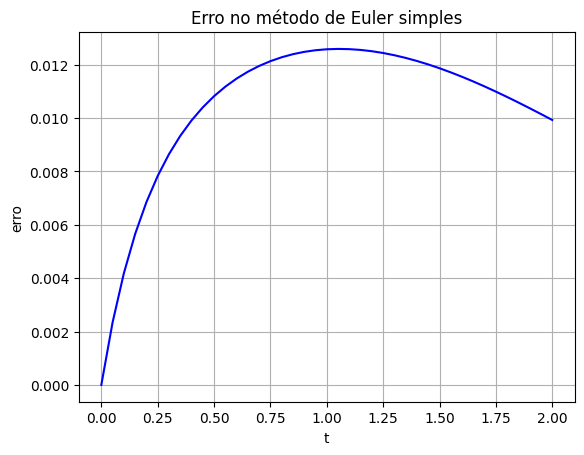

In [ ]:
plt.plot(t,abs(yexata(t)-y),'b-')
plt.grid(True)
plt.title("Erro no método de Euler simples");
plt.xlabel('t')
plt.ylabel('erro')

## 2. Equações diferenciais ordinárias de segunda ordem

Consideremos um problema de valor inicial envolvendo uma equação diferencial ordinária de segunda ordem, da forma

$$
y'' = f(t,y(t), y'(t))\,,\qquad y(t_0)=y_0,\qquad y'(t_0)=y_0'\,.
$$

Podemos reescrever esta equação na forma de um sistema de duas equações de primeira ordem, definindo $u_1=y$ e $u_2=y'$:

$$
u_1' = u2\,,\qquad u_2' = f(t,u_1(t), u_2(t))\,, \qquad u_1(t_0)=y_0\,,\quad u_2(t_0) = y_0'\,.
$$

O método de Euler simples pode agora ser aplicada às duas equações simultaneamente:

\begin{align}
&u_1(t+h)=u_1(t)+h u_2(t)\\
&u_2(t+h)=u_2(t)+h f(t,u_1(t),u_2(t))
\end{align}

Façamos a implementação deste procedimento. Definimos uma função que tem como entrada a função $f$, o array $t$ que define a malha e as condições iniciais:

In [ ]:
def odeEuler2(f, t, y0, y1):
    N = len(t)
    u1 = np.empty(N)  # y
    u2 = np.empty(N)  # y'

    u1[0] = y0
    u2[0] = y1
    h = t[1] - t[0]  # assume passo constante

    for n in range(N - 1):
        u1[n + 1] = u1[n] + h * u2[n]
        u2[n + 1] = u2[n] + h * f(t[n], u1[n], u2[n])

    return u1, u2

### Exemplo 2.1
Apliquemos esta função ao seguinte PVI:

$$
y''=  2t\sin y+t^2+y^2t\,,\qquad y(0)=0\,,\quad y'(0)=1\,.
$$

Definimos $f$:

In [ ]:
f = lambda x,u1,u2: 2*x*np.sin(u2)+x**2+u2**2*x

Definimos a malha:

In [ ]:
t = np.linspace(0,1,21)

Definimos as condições iniciais:

In [ ]:
y0 = 0
y1 = 1

Aplicamos o método de Euler simples:

In [ ]:
(U1,U2) = odeEuler2(f,t,y0,y1)

Façamos um gráfico com os resultados. Inicialmente mostramos o comportamento de $y(t)$:

Text(0, 0.5, 'y')

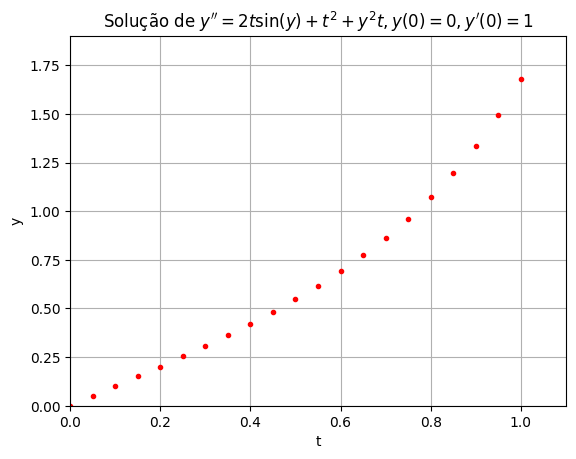

In [ ]:
plt.plot(t,U1,'r.')
plt.axis([0,1.1,0,1.9])
plt.grid(True)
plt.title(r"Solução de $y''=2t\sin(y)+t^2+y^2t , y(0)=0, y'(0)=1$")
plt.xlabel('t')
plt.ylabel('y')

Agora a solução $y'(t)$:

Text(0, 0.5, 'dy/dt')

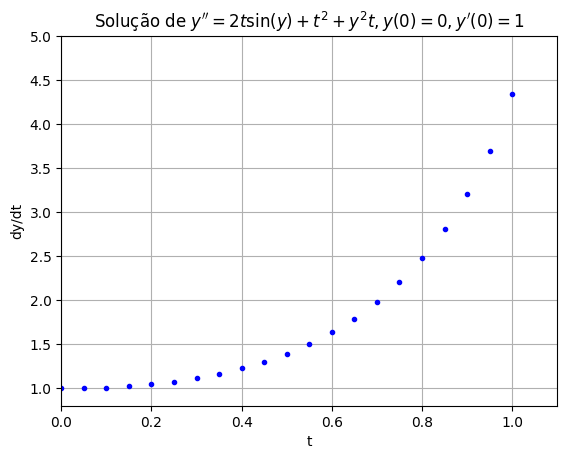

In [ ]:
plt.plot(t,U2,'b.')
plt.axis([0,1.1,0.8,5])
plt.grid(True)
plt.title(r"Solução de $y''=2t\sin(y)+t^2+y^2t , y(0)=0, y'(0)=1$")
plt.xlabel('t')
plt.ylabel("dy/dt")

Finalmente apresentamos o retrato de fase, $y(x) \times y'(t)$:

Text(0, 0.5, 'dy/dt')

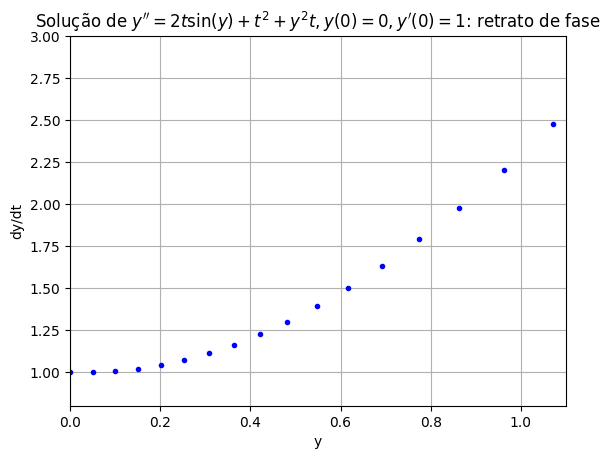

In [ ]:
plt.plot(U1,U2,'b.')
plt.axis([0,1.1,0.8,3])
plt.grid(True)
plt.title(r"Solução de $y''=2t\sin(y)+t^2+y^2t , y(0)=0, y'(0)=1$: retrato de fase")
plt.xlabel('y')
plt.ylabel("dy/dt")

### Exemplo 2.1
Apliquemos o método de Euler simples a uma EDO de segunda ordem que admite solução exata para examinar a acurácia do método. Consideremos o seguinte PVI

$$
y'' +4y'+2y=\mbox{e}^{2t}\,,\qquad y(0)=1\,, \qquad y'(0)=3
$$

e determinemos a solução no intervalo $[0,2.5]$ com subintervalos $h=0.025$.
Esta é uma equação linear não homogênea que pode ser resolvido exatamente usando o método dos coeficientes indeterminados. A solução exata é dada por

$$
y = \mbox{e}^{(-2+\sqrt{2})t} \left(\frac{13}{28}+\frac{33\sqrt{2}}{28}\right)+
\mbox{e}^{-(2+\sqrt{2})t} \left(\frac{13}{28}-\frac{33\sqrt{2}}{28}\right)+\frac{\mbox{e}^{2t}}{14}\,.
$$

Resolvamos este problema usando o método de Euler simples.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
f = lambda x,u1,u2: -4*u2-2*u1+np.exp(2*x)

In [ ]:
t = np.linspace(0,2.5,101)

In [ ]:
y0 = 1
y1 = 3

In [ ]:
def odeEuler2(f, t, y0, y1):
    N = len(t)
    u1 = np.empty(N)  # y
    u2 = np.empty(N)  # y'

    u1[0] = y0
    u2[0] = y1
    h = t[1] - t[0]  # assume passo constante

    for n in range(N - 1):
        u1[n + 1] = u1[n] + h * u2[n]
        u2[n + 1] = u2[n] + h * f(t[n], u1[n], u2[n])

    return u1, u2

In [ ]:
(U1,U2) = odeEuler2(f,t,y0,y1)

Façamos os gráficos da solução exata e numérica simultaneamente:

In [ ]:
ye = lambda x: np.exp((-2.+2**(1/2))*x)*(13./28.+33.*2**(1/2)/28)+np.exp(-(2.+2**(1/2))*x)*(13./28.-33.*2**(1/2)/28)+np.exp(2*x)/14

Text(0, 0.5, 'y')

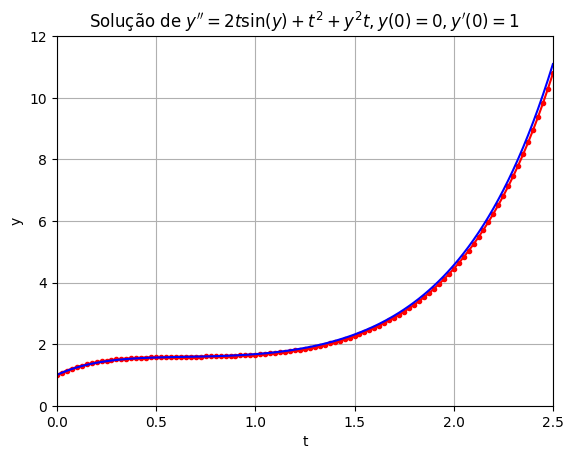

In [ ]:
plt.plot(t,U1,'r.-')
plt.plot(t,ye(t),'b-')
plt.axis([0,2.5,0,12])
plt.grid(True)
plt.title(r"Solução de $y''=2t\sin(y)+t^2+y^2t , y(0)=0, y'(0)=1$")
plt.xlabel('t')
plt.ylabel('y')

Text(0, 0.5, 'erro')

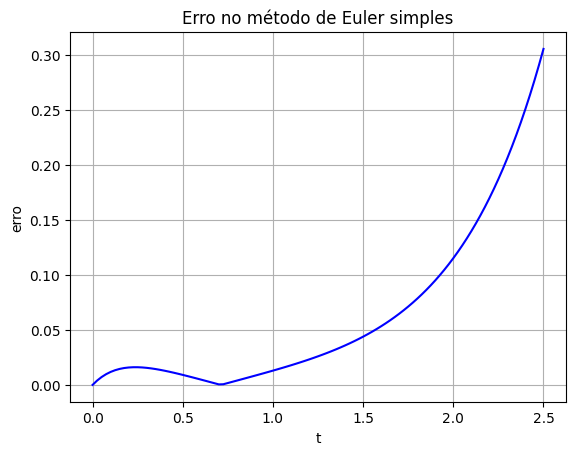

In [ ]:
plt.plot(t,abs(ye(t)-U1),'b-')
plt.grid(True)
plt.title(r"Erro no método de Euler simples");
plt.xlabel('t')
plt.ylabel('erro')

## 3. Exercícios

1. Resolva os problemas de valor inicial abaixo usando o método de Euler simples, no intervalo indicado. Apresente cada solução graficamente. Use o número de subintervalos que achar adequado (normalmente o mínimo para produzir um bom resultado).

\begin{align}
(i) & \qquad y'+ y \sin y -ty=3\,,\qquad y(0)=1,\,\,t\in [0,2].\\
(ii) & \qquad y''+t y'+4y = \sin(4t),\qquad y(0)=1\,, y'(0) = -1,\,t\in [0,4].\\
\end{align}

2. Um corpo de massa $m$ cai em recipiente com óleo que oferece uma força de resistência $F_r = -\gamma v^b$ Use o método de Euler para determinar $v(t)$ para $b=0.5$, $b=0.7$ e $b=1.5$. Para determinar o intervalo de tempo no qual o método de Euler fornece uma boa aproximação, compare a solução numérica com a exata no caso em que $b=1$. Use $\gamma=0.7\,N\,(s/m)^b$.


3. Resolva o problema do pêndulo linear livre usando o método de Euler e compare com a solução exata. Escolha o valor dos parâmetros e das condições iniciais. Estime o intervalo no qual o método de Euler fornece uma boa aproximação.


4. Resolva o problema do pêndulo não linear livre usando o método de Euler, usando os mesmos parâmetros e condições iniciais do problema 3. Use o intervalo onde o método de Euler funciona razoavelmente bem, determinado no problema 3. Compare o resultado com a aquele dado pela solução exata do problema 3.


5. Um sistema massa mola-mola-amortecedor tem massa $M$, mola não-linear com lei de força $F=-\kappa x-\epsilon_1 x^a$ e amortecedor não linear que tem lei de força $F_{\gamma}=-\gamma v -\epsilon_2 v^b$. (i) Resolve numericamente este problema usando o método de Euler simples para $M=1\,kg$, $\kappa=2\,N/m$, $\gamma=0.4\,N\;s/m$, $\epsilon_1=0.05\,N/m^a$,
$\epsilon_2=0.08\,N\,(s/m)^b$, $a=2$, $b=2$. Compare os diagramas $x(t) \times t$,  $v(t) \times t$ e $x(t) \times v(t)$ (diagrama de fase) com os respectivos no caso em que $\epsilon_1=\epsilon_2=0$ (oscilador linear). Escolha as condições iniciais e estime até onde o método de Euler fornece uma boa aproximação.